In [70]:
%reload_ext autoreload
%autoreload 2

In [71]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from data import CancerDataset
from pathlib import Path
from sklearn.model_selection import train_test_split
from model import CancerDetector
from torch import nn, optim
from matplotlib import pyplot as plt

In [72]:
test_size = 0.2
batch_size = 32

data_dir = Path("dataset")
data_path = data_dir / "survey_lung_cancer.csv"
df = pd.read_csv(data_path)
df_train, df_test = train_test_split(df, test_size=test_size, random_state=23)
train_dataset = CancerDataset(df_train)
test_dataset = CancerDataset(df_test)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [73]:
model = CancerDetector()

In [74]:
# train_features, train_labels = (next(iter(train_dataloader)))

In [75]:
criterion = torch.nn.BCELoss()
learning_rate = 3e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [76]:
def train_loop(model, dataloader, criterion, optimizer):
    mean_loss = 0
    for x, y in dataloader:
        pred = model(x)
        loss = criterion(pred.squeeze(), y)
        mean_loss += loss.item() / len(dataloader)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return mean_loss

In [77]:
@torch.no_grad()
def val_loop(model, dataloader, criterion):
    mean_loss = 0
    for x, y in dataloader:
        pred = model(x)
        loss = criterion(pred.squeeze(), y)
        mean_loss += loss.item() / len(dataloader)
    return mean_loss


In [78]:

def train(epochs, model, dataloader, criterion, optimizer):
    train_losses = []
    val_losses = []

    for _ in range(epochs):
        train_loss = train_loop(model, dataloader, criterion, optimizer)
        val_loss = val_loop(model, dataloader, criterion)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return train_losses, val_losses

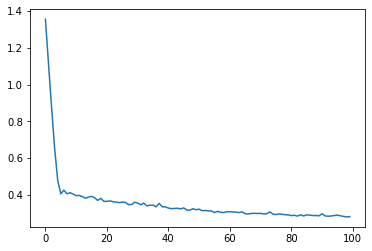

In [79]:
train_losses, val_losses = train(100, model, train_dataloader, criterion, optimizer)
plt.plot(train_losses)